In [28]:
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import textacy
from textacy.datasets import Wikipedia
from collections import Counter, defaultdict
import warnings; warnings.simplefilter('ignore')
import spacy
from nltk.corpus import stopwords
# Libro elegido: http://www.gutenberg.org/cache/epub/55448/pg55448.txt
# graficos incrustados
%matplotlib inline

nlp = spacy.load('es')

# función auxiliar
def leer_texto(texto):
    """Funcion auxiliar para leer un archivo de texto"""
    with open(texto, 'r') as text:
        return text.read()

def encontrar_personajes(doc):
    personajes = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PER':
            personajes[ent.lemma_] += 1
    return personajes.most_common()

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

In [29]:
texto = leer_texto('./pg55448.txt')

texto_procesado = nlp(texto)
# limpiamos la licencia
sentencias = [s for s in texto_procesado.sents]
sentencias = sentencias[50:1650]

texto_procesado = nlp(" ".join(str(x) for x in sentencias))
# Stop words
stops = stopwords.words("spanish")

In [32]:
# obtenemos el texto procesado, sin stopwords
procesado = normalize(texto_procesado.text, lowercase=True, remove_stopwords=True)

texto_procesado_limpio = nlp(procesado)

II Las trinchero ser zanjar barroso angosto . Amarillentas aguar lluvia avenir encharcar . Se resbalar andar . Los ratón correr vivaz talud , rata aguaneras fondo cenagoso , ráfaga viento traer frío pestilencia carroña . En talud trinchero zapador haber cavar hondo abrigo guarecer escuadrar soldar , lugar propicio parir escuchar centinela , silo miradero disimular entrar pedrusco ramaje . Desde atalayar hacer descubrir líneo enemigo , artillero , comunicándose teléfono , regular tirar cañón , siempre emplazar atrás primero defensa . Ante do foso enemigo tender campo espinoso alambrar , haber esguevas muerto último jornada pudrir sobrar hueso mondo aquel caer primero día invasión . La tierra tornar comer arar . La metralla talar árbol abrasar yerba . Del fondo trinchero surgir cohete luz rojo , verde blanco , abrir aire noche oscuro , esclarecer brevemente aquel vasto campar batallar . Corre alertar cantil mar norteño , bosque montañero divisar Rhin . CAP . III En sombrar noche , largo 

In [33]:
print(encontrar_personajes(texto_procesado_limpio))

[('Project Gutenberg', 56), ('CAP', 31), ('License', 8), ('Project Gutenberg Literary Archive Foundation', 5), ('Saluda', 2), ('¡ Piedad', 2), ('Picardia', 2), ('¡ Franceses !', 2), ('Son', 2), ('Thann Metzeral', 2), ('Sir Francisco Murray', 2), ('Palidecen', 2), ('Acabó', 1), ('Revolución', 1), ('Donations', 1), ('Agazapándose', 1), ('Odio', 1), ('¡ Haber', 1), ('Verdun Reims', 1), ('Juana', 1), ('Vacía', 1), ('Descansan', 1), ('¡ Nadie', 1), ('¡ Toc !', 1), ('Queda', 1), ('Chuck Greif', 1), ('S. Fairbanks', 1), ('Abren', 1), ('¡ Hurra !', 1), ('Patrullas', 1), ('ESTE LIBRO', 1), ('¡ Ay', 1), ('¡ Hurra', 1), ('Cavan', 1), ('Salió', 1), ('Defect', 1), ('¡ Piedad !', 1), ('Sir Guillermo Scott', 1), ('Thus', 1), ('Project Gutenberg-', 1), ('Capitán Douchesne', 1), ('África Oceanía', 1), ('To', 1), ('Do', 1), ('Professor Michael S. Hart', 1), ('Escucha', 1), ('Transmito', 1), ('However', 1), ('Besa', 1), ('Arden', 1), ('¡ Qué', 1), ('Dan', 1), ('Desfilan', 1), ('Sesgan', 1), ('Ocupan', 1)

In [65]:
doc = {}

for entry in texto_procesado_limpio.text.split(' '):
    if (doc.__contains__(entry)):
        doc[entry] = int(doc.get(entry)) + 1
    else:
        doc[entry] = 1


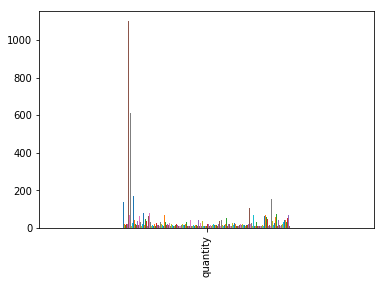

In [86]:
import operator
d = {k: v for k, v in doc.items() if v > 10}
d = dict(sorted(d.items(), key=operator.itemgetter(1)))

pd.DataFrame(d, index=['quantity']).plot(kind='bar', legend=False)

In [ ]:
#edgeList = [ [0, 2], [1, 3], [2, 3],
#[2, 4], [3, 5], [4, 5] ];
#adjMatrix = [...];
#adjList = [...];